# LETS GROW MORE (LGMVIPFEB2022)

## Author:Chandrima Thakur
## Task 2 : Stock Market Prediction And Forecasting Using Stacked LSTM
## Level : Beginner
## Language : Python


## IMPORTING DATASET

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

## READING THE DATA-SET

In [2]:
df=pd.read_csv("nse.csv")
print("Data imported successfully")
df.head()

Data imported successfully


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## LOOKING INTO THE SHAPE

In [3]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
print('\n')

The dataset has 2035 rows and 8 columns




## DESCRIPTIVE SUMMARY OF THE DATASET

In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,2035,2035,9/28/2018,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,2035.0,NaN,NaN,NaN,149.713735,48.664509,81.1,120.025,141.5,157.175,327.7
High,2035.0,NaN,NaN,NaN,151.992826,49.413109,82.8,122.1,143.4,159.4,328.75
Low,2035.0,NaN,NaN,NaN,147.293931,47.931958,80.0,118.3,139.6,155.15,321.65
Last,2035.0,NaN,NaN,NaN,149.474251,48.73257,81.0,120.075,141.1,156.925,325.95
Close,2035.0,NaN,NaN,NaN,149.45027,48.71204,80.95,120.05,141.25,156.9,325.75
Total Trade Quantity,2035.0,NaN,NaN,NaN,2335681.404423,2091778.130824,39610.0,1146444.5,1783456.0,2813594.0,29191015.0
Turnover (Lacs),2035.0,NaN,NaN,NaN,3899.980565,4570.767877,37.04,1427.46,2512.03,4539.015,55755.08


## CHECKING FOR MISSING VALUES

In [5]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

There are no missing values in the data

## FORMATTING DATE

In [6]:
df['Date'] = pd.to_datetime(df.Date,dayfirst=True)
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# CONVERT TIME SERIES TO BE SPECIFIED FREQUENCY

In [7]:
df = df.asfreq("d")
df = df.fillna(method='bfill')

## VISUALIZATION

Text(0, 0.5, 'Close Price')

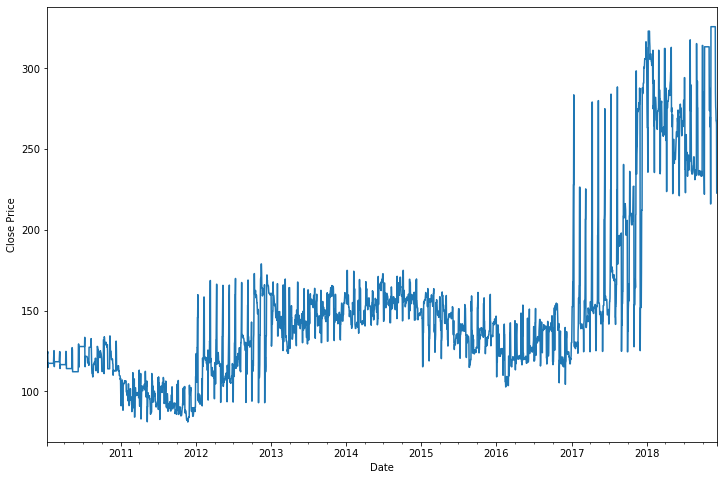

In [8]:
df['Close'].plot(figsize=(12,8))
plt.ylabel("Close Price")

Text(0, 0.5, 'Open Price')

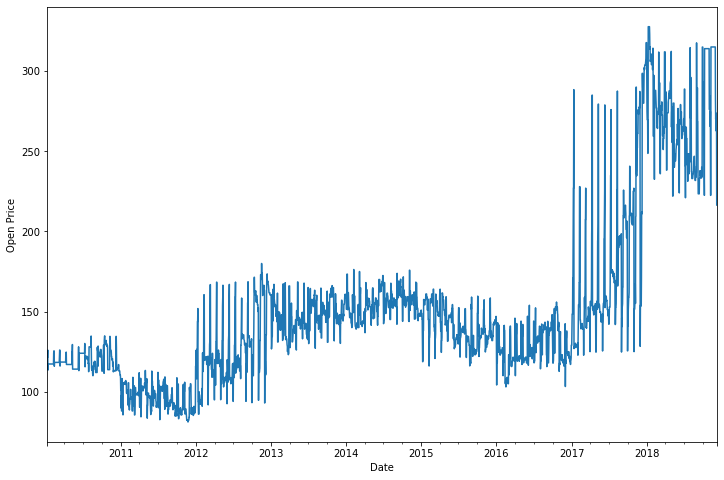

In [9]:
df['Open'].plot(figsize=(12,8))
plt.ylabel("Open Price")

Text(0, 0.5, 'Volume Price')

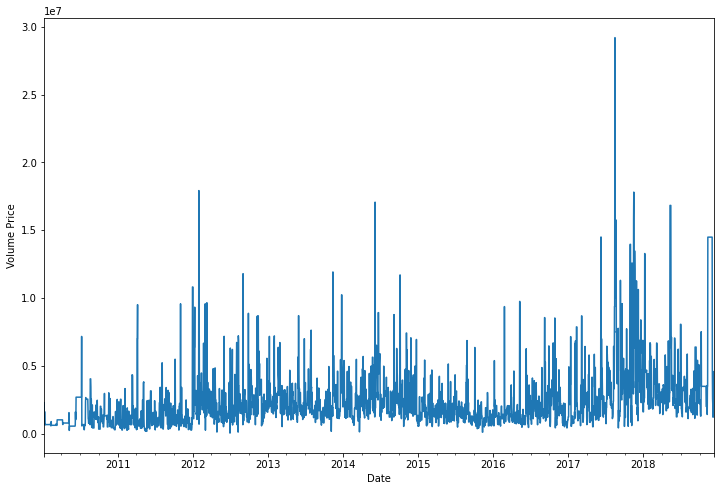

In [10]:
df['Total Trade Quantity'].plot(figsize=(12,8))
plt.ylabel("Volume Price")

Text(0.5, 1.0, 'Turnver in Lacs')

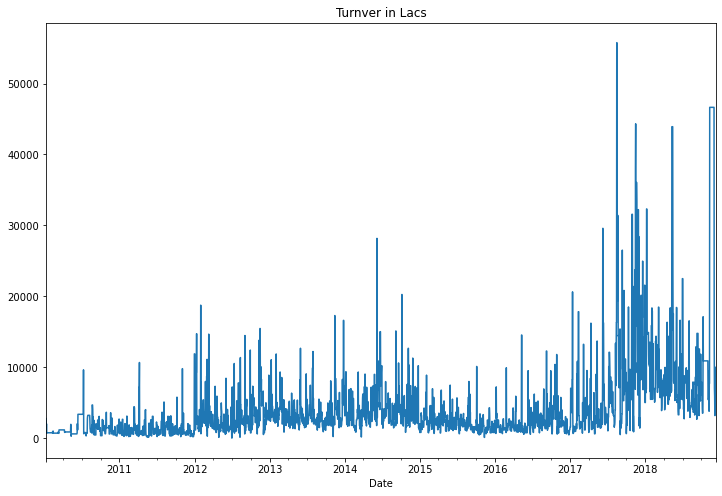

In [11]:
df['Turnover (Lacs)'].plot(figsize=(12,8))
plt.title('Turnver in Lacs')

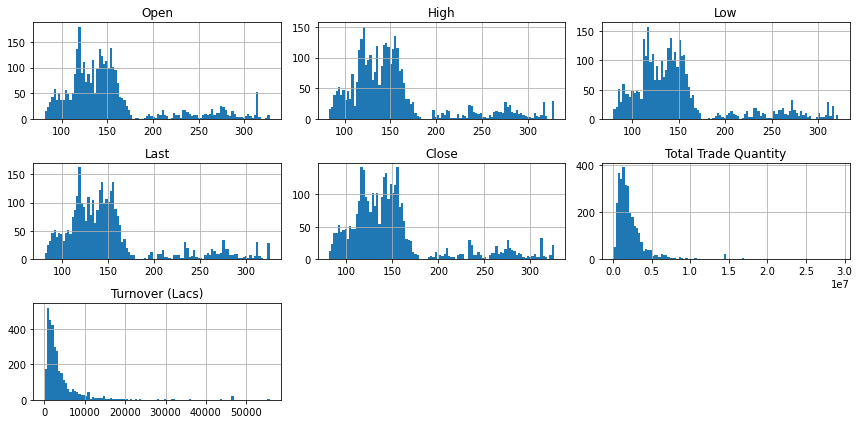

In [12]:
df.hist(bins=100, figsize=(12,6))
plt.tight_layout()

<AxesSubplot:xlabel='Date'>

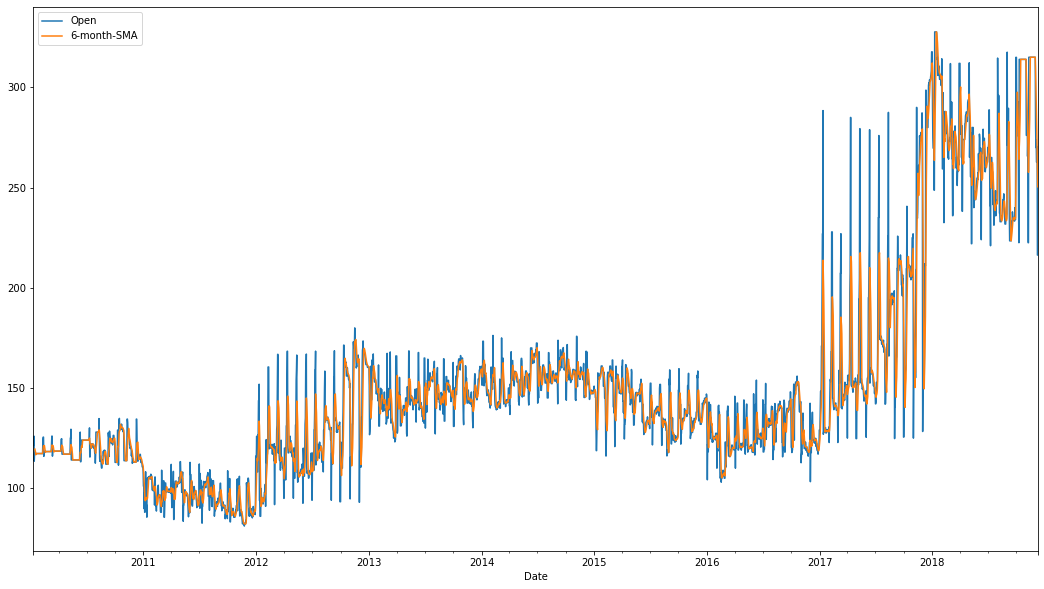

In [13]:
df['6-month-SMA'] = df['Open'].rolling(window=6).mean()
df[["Open","6-month-SMA"]].plot(figsize=(18,10))

# MIN MAX SCALAR

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(df['Close']).reshape(-1,1))
dff

array([[0.17177288],
       [0.17381536],
       [0.17810458],
       ...,
       [0.75265523],
       [0.57883987],
       [0.57883987]])

In [15]:
df.drop(['6-month-SMA'], axis=1)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-01-09,121.65,123.65,120.20,122.70,123.00,2274887.0,2781.63
2010-01-10,121.30,124.00,121.30,123.60,123.50,711861.0,875.04
2010-01-11,126.00,128.40,123.00,124.50,124.55,1621553.0,2044.44
2010-01-12,113.50,116.00,113.00,114.50,114.75,628391.0,722.87
2010-01-13,117.30,118.50,116.60,118.10,117.30,663593.0,779.85
...,...,...,...,...,...,...,...
2018-12-05,262.75,268.40,262.75,267.20,267.60,1206633.0,3209.40
2018-12-06,262.75,268.40,262.75,267.20,267.60,1206633.0,3209.40
2018-12-07,270.40,272.45,264.35,264.50,265.20,2250217.0,6045.37


In [16]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

# MAKING A DATASET

In [17]:
def cd(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# SPLITTING DATA INTO TRAINING AND TESTING

In [18]:
time_step = 100
X_train, y_train = cd(train_data, time_step)
X_test, ytest = cd(test_data, time_step)

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## CREATING THE MODEL

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_split=0.1,epochs=78,batch_size=64,verbose=1)

Epoch 1/78
31/31 [==============================] - 16s 296ms/step - loss: 0.0088 - val_loss: 0.0020
Epoch 2/78
31/31 [==============================] - 7s 230ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 3/78
31/31 [==============================] - 7s 225ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 4/78
31/31 [==============================] - 7s 226ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 5/78
31/31 [==============================] - 7s 226ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 6/78
31/31 [==============================] - 7s 226ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 7/78
31/31 [==============================] - 7s 228ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 8/78
31/31 [==============================] - 7s 232ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/78
31/31 [==============================] - 7s 232ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 10/78
31/31 [==============================] - 7s 238ms/step - loss: 0.0018 - val_loss: 0.001

In [23]:
test_predict=model.predict(X_test)
test_predicted=scaler.inverse_transform(test_predict)

## CALCULATING PERFORMANCE

In [24]:
import math
from sklearn.metrics import mean_squared_error
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.1299969313004194